# Taxi and Cab EDA Investment Proposal

## 1. Business Understanding

**OBJECTIVE:** XYZ is a private company interested in investing in the rapidly growing taxi and cab industry. In order to make informed investment decisions, they are conducting a detailed exploratory data analysis and data mining of major cities across the United States. The objective is to provide actionable insights and identify trends that can inform strategic investment decisions.
<br>
<br>
<br>
**Project Plan:** Investigate the data sources to provide accurate explanatory data analysis to help decision makers gain insight to the cab and taxi industry and select the best option to invest.
<br>
<br>
<br>
**Success Criteria:** Presentation for the XYZ's stakeholders and executive team via visuals to help them in decision  making process.
<br>
<br>
<br>
 **Analysis Hypothesis:**
  - Which Company has the best profit on sales over the others?
  - Which city has the most profit and average profit per trip among the others?
  - Are there any seasonality in the using of cusomer? What timeframe does it have?
  - Cab demand is higher on weekends than weekdays?
  - Is there any changes of demand exists in the US Holidays?
  - Is there a difference in the average fare price between different cab companies?
  - Is there a significant difference in sales or profit based on the type of payment method used by customers?


## 2. Data Understanding

### 2.1. Data Exploration

#### Data Loading

In [1]:
# Importig packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [57]:
# Loading datasets
cab_data = pd.read_csv(r'data/Cab_Data.csv')
city = pd.read_csv(r'data/City.csv')
customer_id = pd.read_csv(r'data/Customer_ID.csv')
transaction_id = pd.read_csv(r'data/Transaction_ID.csv')

In [58]:
cab_data.head()

Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

In [4]:
city.head()

City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247

In [5]:
customer_id.head()

Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

In [6]:
transaction_id.head()

Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card

In [7]:
# Summary function
def summary(df):
    summary = pd.DataFrame(df.dtypes, columns = ['dtypes'])
    summary = summary.reset_index()
    summary['Missing'] = df.isnull().sum().values
    summary['Uniques'] = df.nunique().values
    return summary
summary(cab_data)

index   dtypes  Missing  Uniques
0  Transaction ID    int64        0   359392
1  Date of Travel    int64        0     1095
2         Company   object        0        2
3            City   object        0       19
4    KM Travelled  float64        0      874
5   Price Charged  float64        0    99176
6    Cost of Trip  float64        0    16291

In [8]:
summary(city)

index  dtypes  Missing  Uniques
0        City  object        0       20
1  Population  object        0       20
2       Users  object        0       20

In [9]:
summary(transaction_id)

index  dtypes  Missing  Uniques
0  Transaction ID   int64        0   440098
1     Customer ID   int64        0    49171
2    Payment_Mode  object        0        2

In [10]:
summary(customer_id)

index  dtypes  Missing  Uniques
0         Customer ID   int64        0    49171
1              Gender  object        0        2
2                 Age   int64        0       48
3  Income (USD/Month)   int64        0    23341

#### Joining Datasets and Master Dataset

In [11]:
# Inner join of transaction_id and cab_data
tran_cab = pd.merge(transaction_id, cab_data, on = 'Transaction ID', how = 'inner')
print(transaction_id.shape)
print(cab_data.shape)
print(tran_cab.shape)

(440098, 3)
(359392, 7)
(359392, 9)


In [12]:
tran_cab.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [13]:
# Left join in customer_id and previous inner join
tancabcus = pd.merge(tran_cab, customer_id, on = 'Customer ID', how= 'left')
print(tran_cab.shape)
print(customer_id.shape)
print(tancabcus.shape)

(359392, 9)
(49171, 4)
(359392, 12)


In [14]:
tancabcus.isnull().sum()

Transaction ID        0
Customer ID           0
Payment_Mode          0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [15]:
# Left join and creating master dataset
df = pd.merge(tancabcus, city, on = 'City', how = 'left')
print(tancabcus.shape)
print(city.shape)
print(df.shape)

(359392, 12)
(20, 3)
(359392, 14)


In [16]:
df.isnull().sum()

Transaction ID        0
Customer ID           0
Payment_Mode          0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

### 2.2. Feature Transformation

In [17]:
# Replacing "," from Population and Users
df['Population'] = df['Population'].str.replace(',', '')
df['Users'] = df['Users'].str.replace(',', '')

# change data type of a column
df['Population'] = df['Population'].astype('int64')
df['Users'] = df['Users'].astype('int64')

In [18]:
df['Users'].describe()

count    359392.000000
mean     158365.582267
std      100850.051020
min        3643.000000
25%       80021.000000
50%      144132.000000
75%      302149.000000
max      302149.000000
Name: Users, dtype: float64

In [19]:
df['Population'].describe()

count    3.593920e+05
mean     3.132198e+06
std      3.315194e+06
min      2.489680e+05
25%      6.712380e+05
50%      1.595037e+06
75%      8.405837e+06
max      8.405837e+06
Name: Population, dtype: float64

In [20]:
# define the population bins and labels
bins = [0, 671000, 1590000, float('inf')]
labels = ['Low Population', 'Medium Population', 'High Population']

# categorize the population based on the bins and labels
df['Population Category'] = pd.cut(df['Population'], bins=bins, labels=labels)


# print the categorized df dataframe
df.head()

Transaction ID  Customer ID Payment_Mode  Date of Travel   Company  \
0        10000011        29290         Card           42377  Pink Cab   
1        10000012        27703         Card           42375  Pink Cab   
2        10000013        28712         Cash           42371  Pink Cab   
3        10000014        28020         Cash           42376  Pink Cab   
4        10000015        27182         Card           42372  Pink Cab   

         City  KM Travelled  Price Charged  Cost of Trip Gender  Age  \
0  ATLANTA GA         30.45         370.95       313.635   Male   28   
1  ATLANTA GA         28.62         358.52       334.854   Male   27   
2  ATLANTA GA          9.04         125.20        97.632   Male   53   
3  ATLANTA GA         33.17         377.40       351.602   Male   23   
4  ATLANTA GA          8.73         114.62        97.776   Male   33   

   Income (USD/Month)  Population  Users Population Category  
0               10813      814885  24701   Medium Population  
1                9237      814885  24701   Medium Population  
2               11242      814885  24701   Medium Population  
3               23327      814885  24701   Medium Population  
4                8536      814885  24701   Medium Population

In [21]:
# divide the Population column by the Users column
df['Population per User'] = df['Population'].div(df['Users'])

# print the resulting dataframe
df.head()

Transaction ID  Customer ID Payment_Mode  Date of Travel   Company  \
0        10000011        29290         Card           42377  Pink Cab   
1        10000012        27703         Card           42375  Pink Cab   
2        10000013        28712         Cash           42371  Pink Cab   
3        10000014        28020         Cash           42376  Pink Cab   
4        10000015        27182         Card           42372  Pink Cab   

         City  KM Travelled  Price Charged  Cost of Trip Gender  Age  \
0  ATLANTA GA         30.45         370.95       313.635   Male   28   
1  ATLANTA GA         28.62         358.52       334.854   Male   27   
2  ATLANTA GA          9.04         125.20        97.632   Male   53   
3  ATLANTA GA         33.17         377.40       351.602   Male   23   
4  ATLANTA GA          8.73         114.62        97.776   Male   33   

   Income (USD/Month)  Population  Users Population Category  \
0               10813      814885  24701   Medium Population   
1                9237      814885  24701   Medium Population   
2               11242      814885  24701   Medium Population   
3               23327      814885  24701   Medium Population   
4                8536      814885  24701   Medium Population   

   Population per User  
0             32.98996  
1             32.98996  
2             32.98996  
3             32.98996  
4             32.98996

count    359392.000000
mean         22.016735
std          21.782954
min           3.111283
25%          11.066502
50%          13.705365
75%          27.820172
max         153.921246
Name: Population per User, dtype: float64

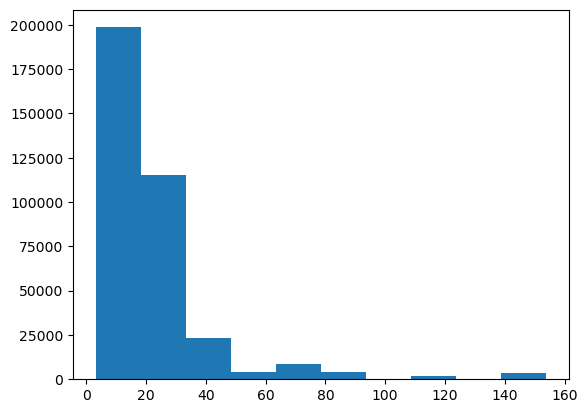

In [22]:
plt.hist(df['Population per User'], bins = 10)
df['Population per User'].describe()

We could see the new variable is right skewed

In [23]:
# define the population bins and labels
bins = [0, 11, 27, float('inf')]
labels = ['Low Users Ratio', 'Medium Users Ratio', 'High Users Ratio']

# categorize the population based on the bins and labels
df['Users Ratio Category'] = pd.cut(df['Population per User'], bins=bins, labels=labels)

# print the categorized df dataframe
df.head()

Transaction ID  Customer ID Payment_Mode  Date of Travel   Company  \
0        10000011        29290         Card           42377  Pink Cab   
1        10000012        27703         Card           42375  Pink Cab   
2        10000013        28712         Cash           42371  Pink Cab   
3        10000014        28020         Cash           42376  Pink Cab   
4        10000015        27182         Card           42372  Pink Cab   

         City  KM Travelled  Price Charged  Cost of Trip Gender  Age  \
0  ATLANTA GA         30.45         370.95       313.635   Male   28   
1  ATLANTA GA         28.62         358.52       334.854   Male   27   
2  ATLANTA GA          9.04         125.20        97.632   Male   53   
3  ATLANTA GA         33.17         377.40       351.602   Male   23   
4  ATLANTA GA          8.73         114.62        97.776   Male   33   

   Income (USD/Month)  Population  Users Population Category  \
0               10813      814885  24701   Medium Population   
1                9237      814885  24701   Medium Population   
2               11242      814885  24701   Medium Population   
3               23327      814885  24701   Medium Population   
4                8536      814885  24701   Medium Population   

   Population per User Users Ratio Category  
0             32.98996     High Users Ratio  
1             32.98996     High Users Ratio  
2             32.98996     High Users Ratio  
3             32.98996     High Users Ratio  
4             32.98996     High Users Ratio

In [24]:
df['Profit'] = df['Price Charged'] - df['Cost of Trip']
df['Profit Per KM'] = df['Profit'].div(df['KM Travelled'])
df.head()

Transaction ID  Customer ID Payment_Mode  Date of Travel   Company  \
0        10000011        29290         Card           42377  Pink Cab   
1        10000012        27703         Card           42375  Pink Cab   
2        10000013        28712         Cash           42371  Pink Cab   
3        10000014        28020         Cash           42376  Pink Cab   
4        10000015        27182         Card           42372  Pink Cab   

         City  KM Travelled  Price Charged  Cost of Trip Gender  Age  \
0  ATLANTA GA         30.45         370.95       313.635   Male   28   
1  ATLANTA GA         28.62         358.52       334.854   Male   27   
2  ATLANTA GA          9.04         125.20        97.632   Male   53   
3  ATLANTA GA         33.17         377.40       351.602   Male   23   
4  ATLANTA GA          8.73         114.62        97.776   Male   33   

   Income (USD/Month)  Population  Users Population Category  \
0               10813      814885  24701   Medium Population   
1                9237      814885  24701   Medium Population   
2               11242      814885  24701   Medium Population   
3               23327      814885  24701   Medium Population   
4                8536      814885  24701   Medium Population   

   Population per User Users Ratio Category  Profit  Profit Per KM  
0             32.98996     High Users Ratio  57.315       1.882266  
1             32.98996     High Users Ratio  23.666       0.826904  
2             32.98996     High Users Ratio  27.568       3.049558  
3             32.98996     High Users Ratio  25.798       0.777751  
4             32.98996     High Users Ratio  16.844       1.929439

In [25]:
# convert the Excel serial date format to datetime format
df['Date'] = pd.to_datetime(df['Date of Travel'], unit='d', origin='1900-01-01')

# extract day, month, and year from the datetime format
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# create a binary variable indicating whether the date falls on a weekend or not
df['Is_Weekend'] = (df['Date'].dt.dayofweek >= 5).astype(int)
# print the result
df.head()

Transaction ID  Customer ID Payment_Mode  Date of Travel   Company  \
0        10000011        29290         Card           42377  Pink Cab   
1        10000012        27703         Card           42375  Pink Cab   
2        10000013        28712         Cash           42371  Pink Cab   
3        10000014        28020         Cash           42376  Pink Cab   
4        10000015        27182         Card           42372  Pink Cab   

         City  KM Travelled  Price Charged  Cost of Trip Gender  Age  \
0  ATLANTA GA         30.45         370.95       313.635   Male   28   
1  ATLANTA GA         28.62         358.52       334.854   Male   27   
2  ATLANTA GA          9.04         125.20        97.632   Male   53   
3  ATLANTA GA         33.17         377.40       351.602   Male   23   
4  ATLANTA GA          8.73         114.62        97.776   Male   33   

   Income (USD/Month)  Population  Users Population Category  \
0               10813      814885  24701   Medium Population   
1                9237      814885  24701   Medium Population   
2               11242      814885  24701   Medium Population   
3               23327      814885  24701   Medium Population   
4                8536      814885  24701   Medium Population   

   Population per User Users Ratio Category  Profit  Profit Per KM       Date  \
0             32.98996     High Users Ratio  57.315       1.882266 2016-01-10   
1             32.98996     High Users Ratio  23.666       0.826904 2016-01-08   
2             32.98996     High Users Ratio  27.568       3.049558 2016-01-04   
3             32.98996     High Users Ratio  25.798       0.777751 2016-01-09   
4             32.98996     High Users Ratio  16.844       1.929439 2016-01-05   

   Day  Month  Year  Is_Weekend  
0   10      1  2016           1  
1    8      1  2016           0  
2    4      1  2016           0  
3    9      1  2016           1  
4    5      1  2016           0

### 2.2. Descriptive Statistics (Univariate Analysis)

#### Common

In [26]:
df.head()

Transaction ID  Customer ID Payment_Mode  Date of Travel   Company  \
0        10000011        29290         Card           42377  Pink Cab   
1        10000012        27703         Card           42375  Pink Cab   
2        10000013        28712         Cash           42371  Pink Cab   
3        10000014        28020         Cash           42376  Pink Cab   
4        10000015        27182         Card           42372  Pink Cab   

         City  KM Travelled  Price Charged  Cost of Trip Gender  Age  \
0  ATLANTA GA         30.45         370.95       313.635   Male   28   
1  ATLANTA GA         28.62         358.52       334.854   Male   27   
2  ATLANTA GA          9.04         125.20        97.632   Male   53   
3  ATLANTA GA         33.17         377.40       351.602   Male   23   
4  ATLANTA GA          8.73         114.62        97.776   Male   33   

   Income (USD/Month)  Population  Users Population Category  \
0               10813      814885  24701   Medium Population   
1                9237      814885  24701   Medium Population   
2               11242      814885  24701   Medium Population   
3               23327      814885  24701   Medium Population   
4                8536      814885  24701   Medium Population   

   Population per User Users Ratio Category  Profit  Profit Per KM       Date  \
0             32.98996     High Users Ratio  57.315       1.882266 2016-01-10   
1             32.98996     High Users Ratio  23.666       0.826904 2016-01-08   
2             32.98996     High Users Ratio  27.568       3.049558 2016-01-04   
3             32.98996     High Users Ratio  25.798       0.777751 2016-01-09   
4             32.98996     High Users Ratio  16.844       1.929439 2016-01-05   

   Day  Month  Year  Is_Weekend  
0   10      1  2016           1  
1    8      1  2016           0  
2    4      1  2016           0  
3    9      1  2016           1  
4    5      1  2016           0

##### Data Types

In [27]:
df.dtypes

Transaction ID                   int64
Customer ID                      int64
Payment_Mode                    object
Date of Travel                   int64
Company                         object
City                            object
KM Travelled                   float64
Price Charged                  float64
Cost of Trip                   float64
Gender                          object
Age                              int64
Income (USD/Month)               int64
Population                       int64
Users                            int64
Population Category           category
Population per User            float64
Users Ratio Category          category
Profit                         float64
Profit Per KM                  float64
Date                    datetime64[ns]
Day                              int64
Month                            int64
Year                             int64
Is_Weekend                       int32
dtype: object

##### Dropping Duplicates

In [28]:
print(df.shape)
df.drop_duplicates(inplace = True)
print(df.shape)

(359392, 24)
(359392, 24)


In [29]:
# Seperating categorical and numerical columns
num = df.select_dtypes(exclude = ['object', 'category', 'int32'])
cat = df.select_dtypes(include = ['object', 'category', 'int32'])

In [30]:
cat.head()

Payment_Mode   Company        City Gender Population Category  \
0         Card  Pink Cab  ATLANTA GA   Male   Medium Population   
1         Card  Pink Cab  ATLANTA GA   Male   Medium Population   
2         Cash  Pink Cab  ATLANTA GA   Male   Medium Population   
3         Cash  Pink Cab  ATLANTA GA   Male   Medium Population   
4         Card  Pink Cab  ATLANTA GA   Male   Medium Population   

  Users Ratio Category  Is_Weekend  
0     High Users Ratio           1  
1     High Users Ratio           0  
2     High Users Ratio           0  
3     High Users Ratio           1  
4     High Users Ratio           0

In [31]:
num.head()

Transaction ID  Customer ID  Date of Travel  KM Travelled  Price Charged  \
0        10000011        29290           42377         30.45         370.95   
1        10000012        27703           42375         28.62         358.52   
2        10000013        28712           42371          9.04         125.20   
3        10000014        28020           42376         33.17         377.40   
4        10000015        27182           42372          8.73         114.62   

   Cost of Trip  Age  Income (USD/Month)  Population  Users  \
0       313.635   28               10813      814885  24701   
1       334.854   27                9237      814885  24701   
2        97.632   53               11242      814885  24701   
3       351.602   23               23327      814885  24701   
4        97.776   33                8536      814885  24701   

   Population per User  Profit  Profit Per KM       Date  Day  Month  Year  
0             32.98996  57.315       1.882266 2016-01-10   10      1  2016  
1             32.98996  23.666       0.826904 2016-01-08    8      1  2016  
2             32.98996  27.568       3.049558 2016-01-04    4      1  2016  
3             32.98996  25.798       0.777751 2016-01-09    9      1  2016  
4             32.98996  16.844       1.929439 2016-01-05    5      1  2016

#### Numerical Features

##### Summary Statistics

In [32]:
df.describe()

Transaction ID    Customer ID  Date of Travel   KM Travelled  \
count    3.593920e+05  359392.000000   359392.000000  359392.000000   
mean     1.022076e+07   19191.652115    42964.067998      22.567254   
std      1.268058e+05   21012.412463      307.467197      12.233526   
min      1.000001e+07       1.000000    42371.000000       1.900000   
25%      1.011081e+07    2705.000000    42697.000000      12.000000   
50%      1.022104e+07    7459.000000    42988.000000      22.440000   
75%      1.033094e+07   36078.000000    43232.000000      32.960000   
max      1.044011e+07   60000.000000    43465.000000      48.000000   

       Price Charged   Cost of Trip            Age  Income (USD/Month)  \
count  359392.000000  359392.000000  359392.000000       359392.000000   
mean      423.443311     286.190113      35.336705        15048.822937   
std       274.378911     157.993661      12.594234         7969.409482   
min        15.600000      19.000000      18.000000         2000.000000   
25%       206.437500     151.200000      25.000000         8424.000000   
50%       386.360000     282.480000      33.000000        14685.000000   
75%       583.660000     413.683200      42.000000        21035.000000   
max      2048.030000     691.200000      65.000000        35000.000000   

         Population          Users  Population per User         Profit  \
count  3.593920e+05  359392.000000        359392.000000  359392.000000   
mean   3.132198e+06  158365.582267            22.016735     137.253198   
std    3.315194e+06  100850.051020            21.782954     160.311840   
min    2.489680e+05    3643.000000             3.111283    -220.060000   
25%    6.712380e+05   80021.000000            11.066502      28.012000   
50%    1.595037e+06  144132.000000            13.705365      81.962000   
75%    8.405837e+06  302149.000000            27.820172     190.030000   
max    8.405837e+06  302149.000000           153.921246    1463.966000   

       Profit Per KM            Day          Month           Year  \
count  359392.000000  359392.000000  359392.000000  359392.000000   
mean        6.083579      15.659784       7.475851    2017.052628   
std         5.543493       8.797606       3.464767       0.802452   
min        -4.998235       1.000000       1.000000    2016.000000   
25%         2.000385       8.000000       5.000000    2016.000000   
50%         4.466809      16.000000       8.000000    2017.000000   
75%         9.170006      23.000000      10.000000    2018.000000   
max        41.115556      31.000000      12.000000    2019.000000   

          Is_Weekend  
count  359392.000000  
mean        0.337094  
std         0.472718  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

#### Disctribution Histograms

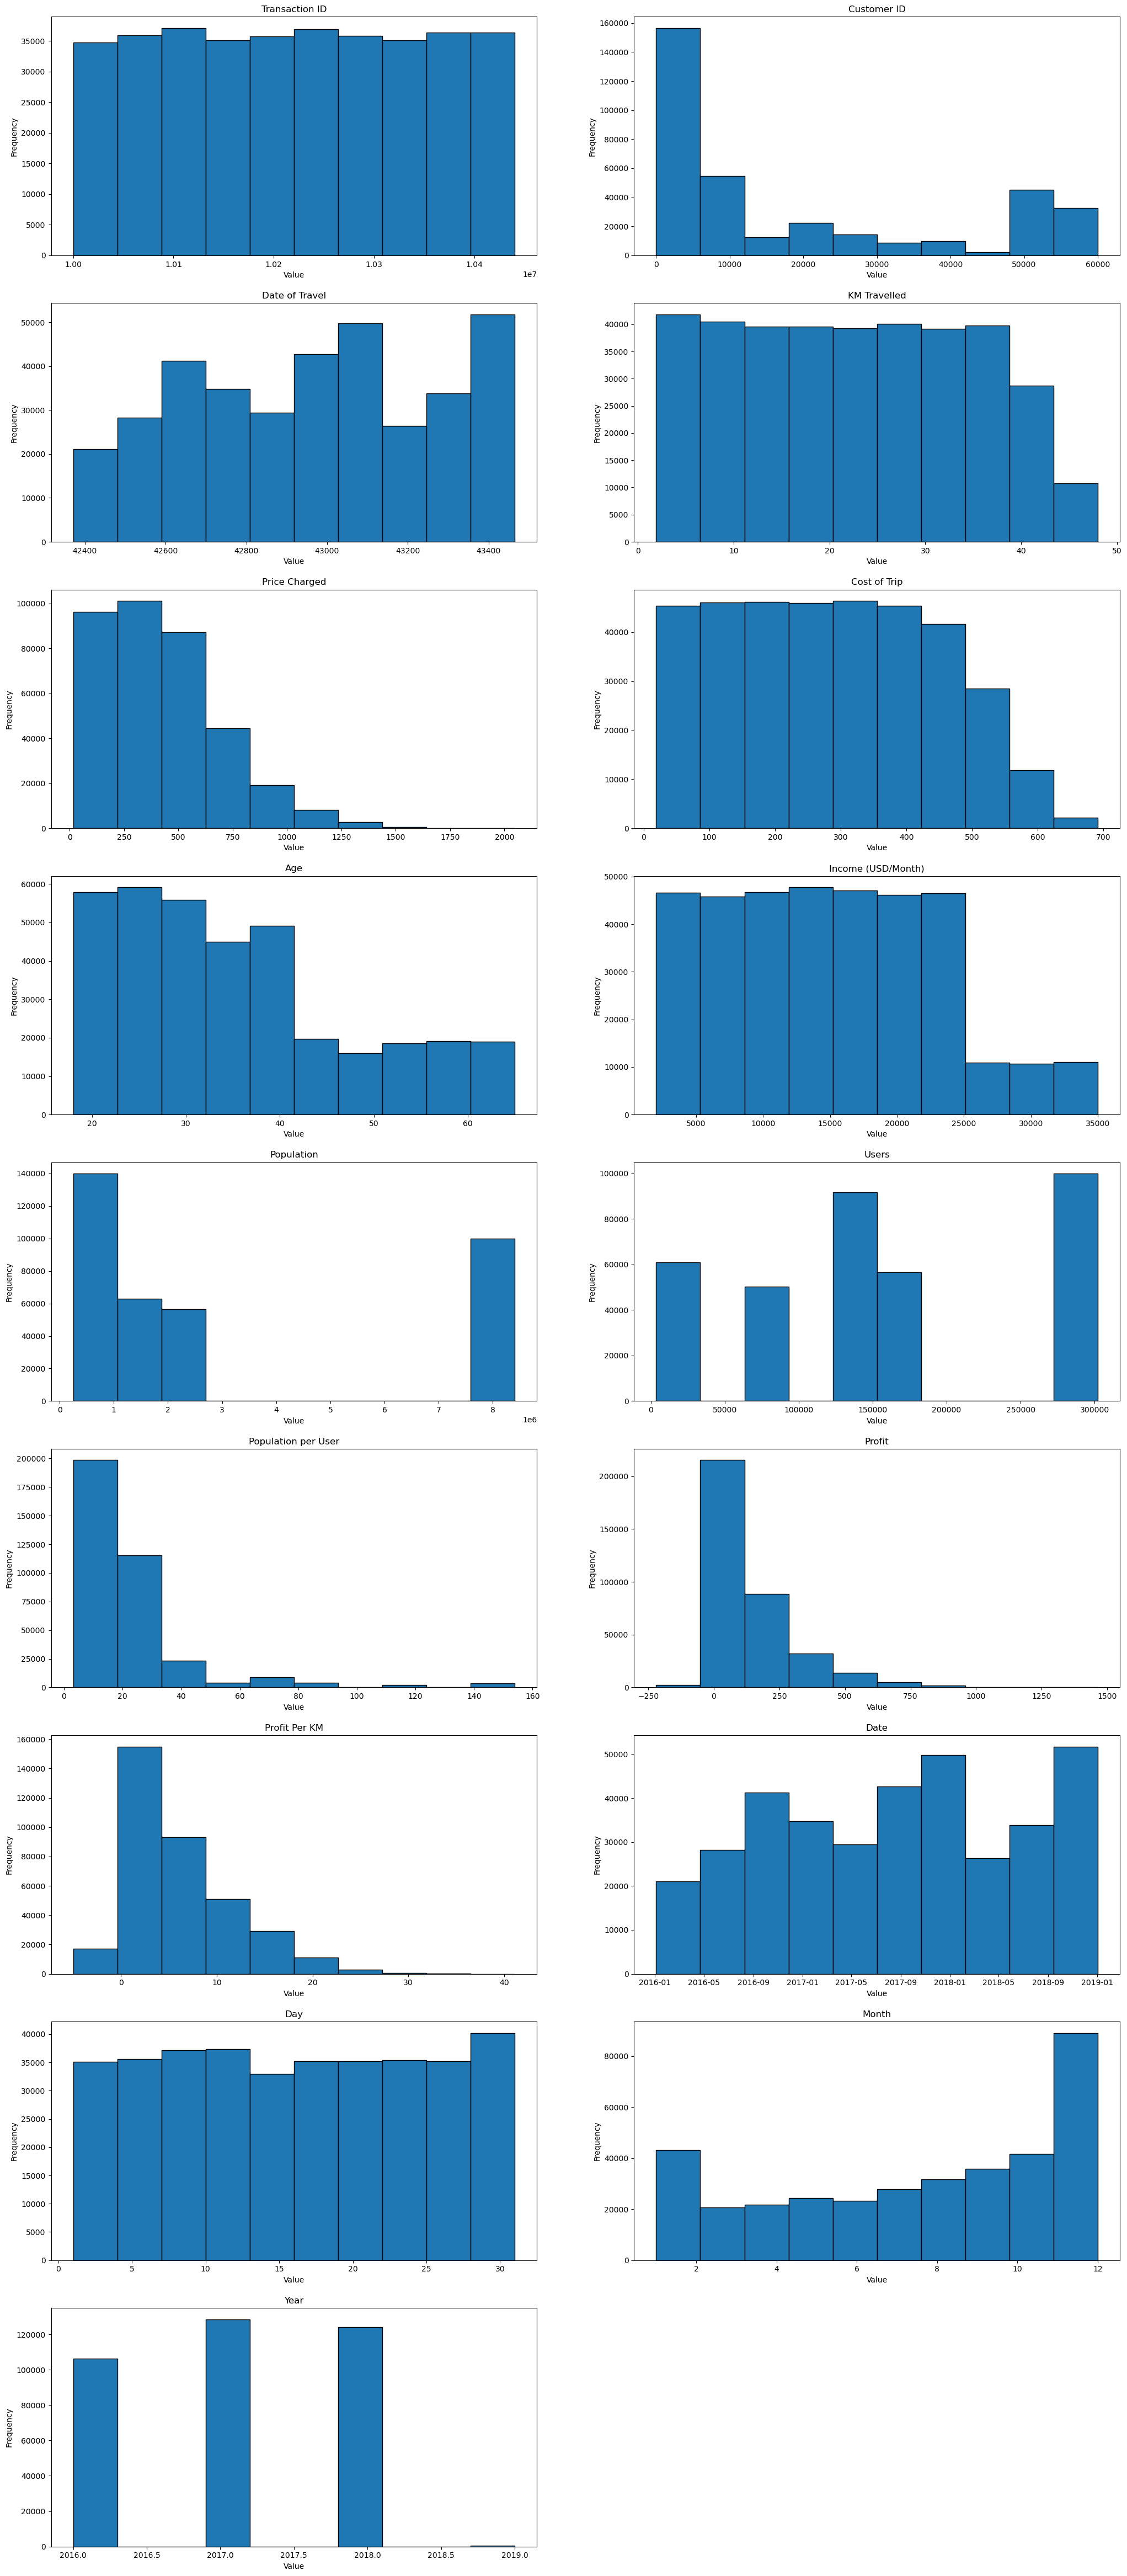

In [33]:
# create figure
fig = plt.figure(figsize = (25, 100))

# loop through numerical columns
for i, column in enumerate(num.columns):
    # create histogram
    plt.subplot(15,2, i+1)
    plt.hist(num[column], bins=10, edgecolor= 'black')
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

# show plot
plt.show()

We could see: 
- KM Traveled is almost constant
- Date of Traveled shows seasonality
- Price Charged is right-skewed
- Cost of Trip is tight-skewed
- Age is also right-skewed
- income is constant with steps
- Population and Users are better to consider as categorical variables

    

### Categorical Features

#### Count Plots

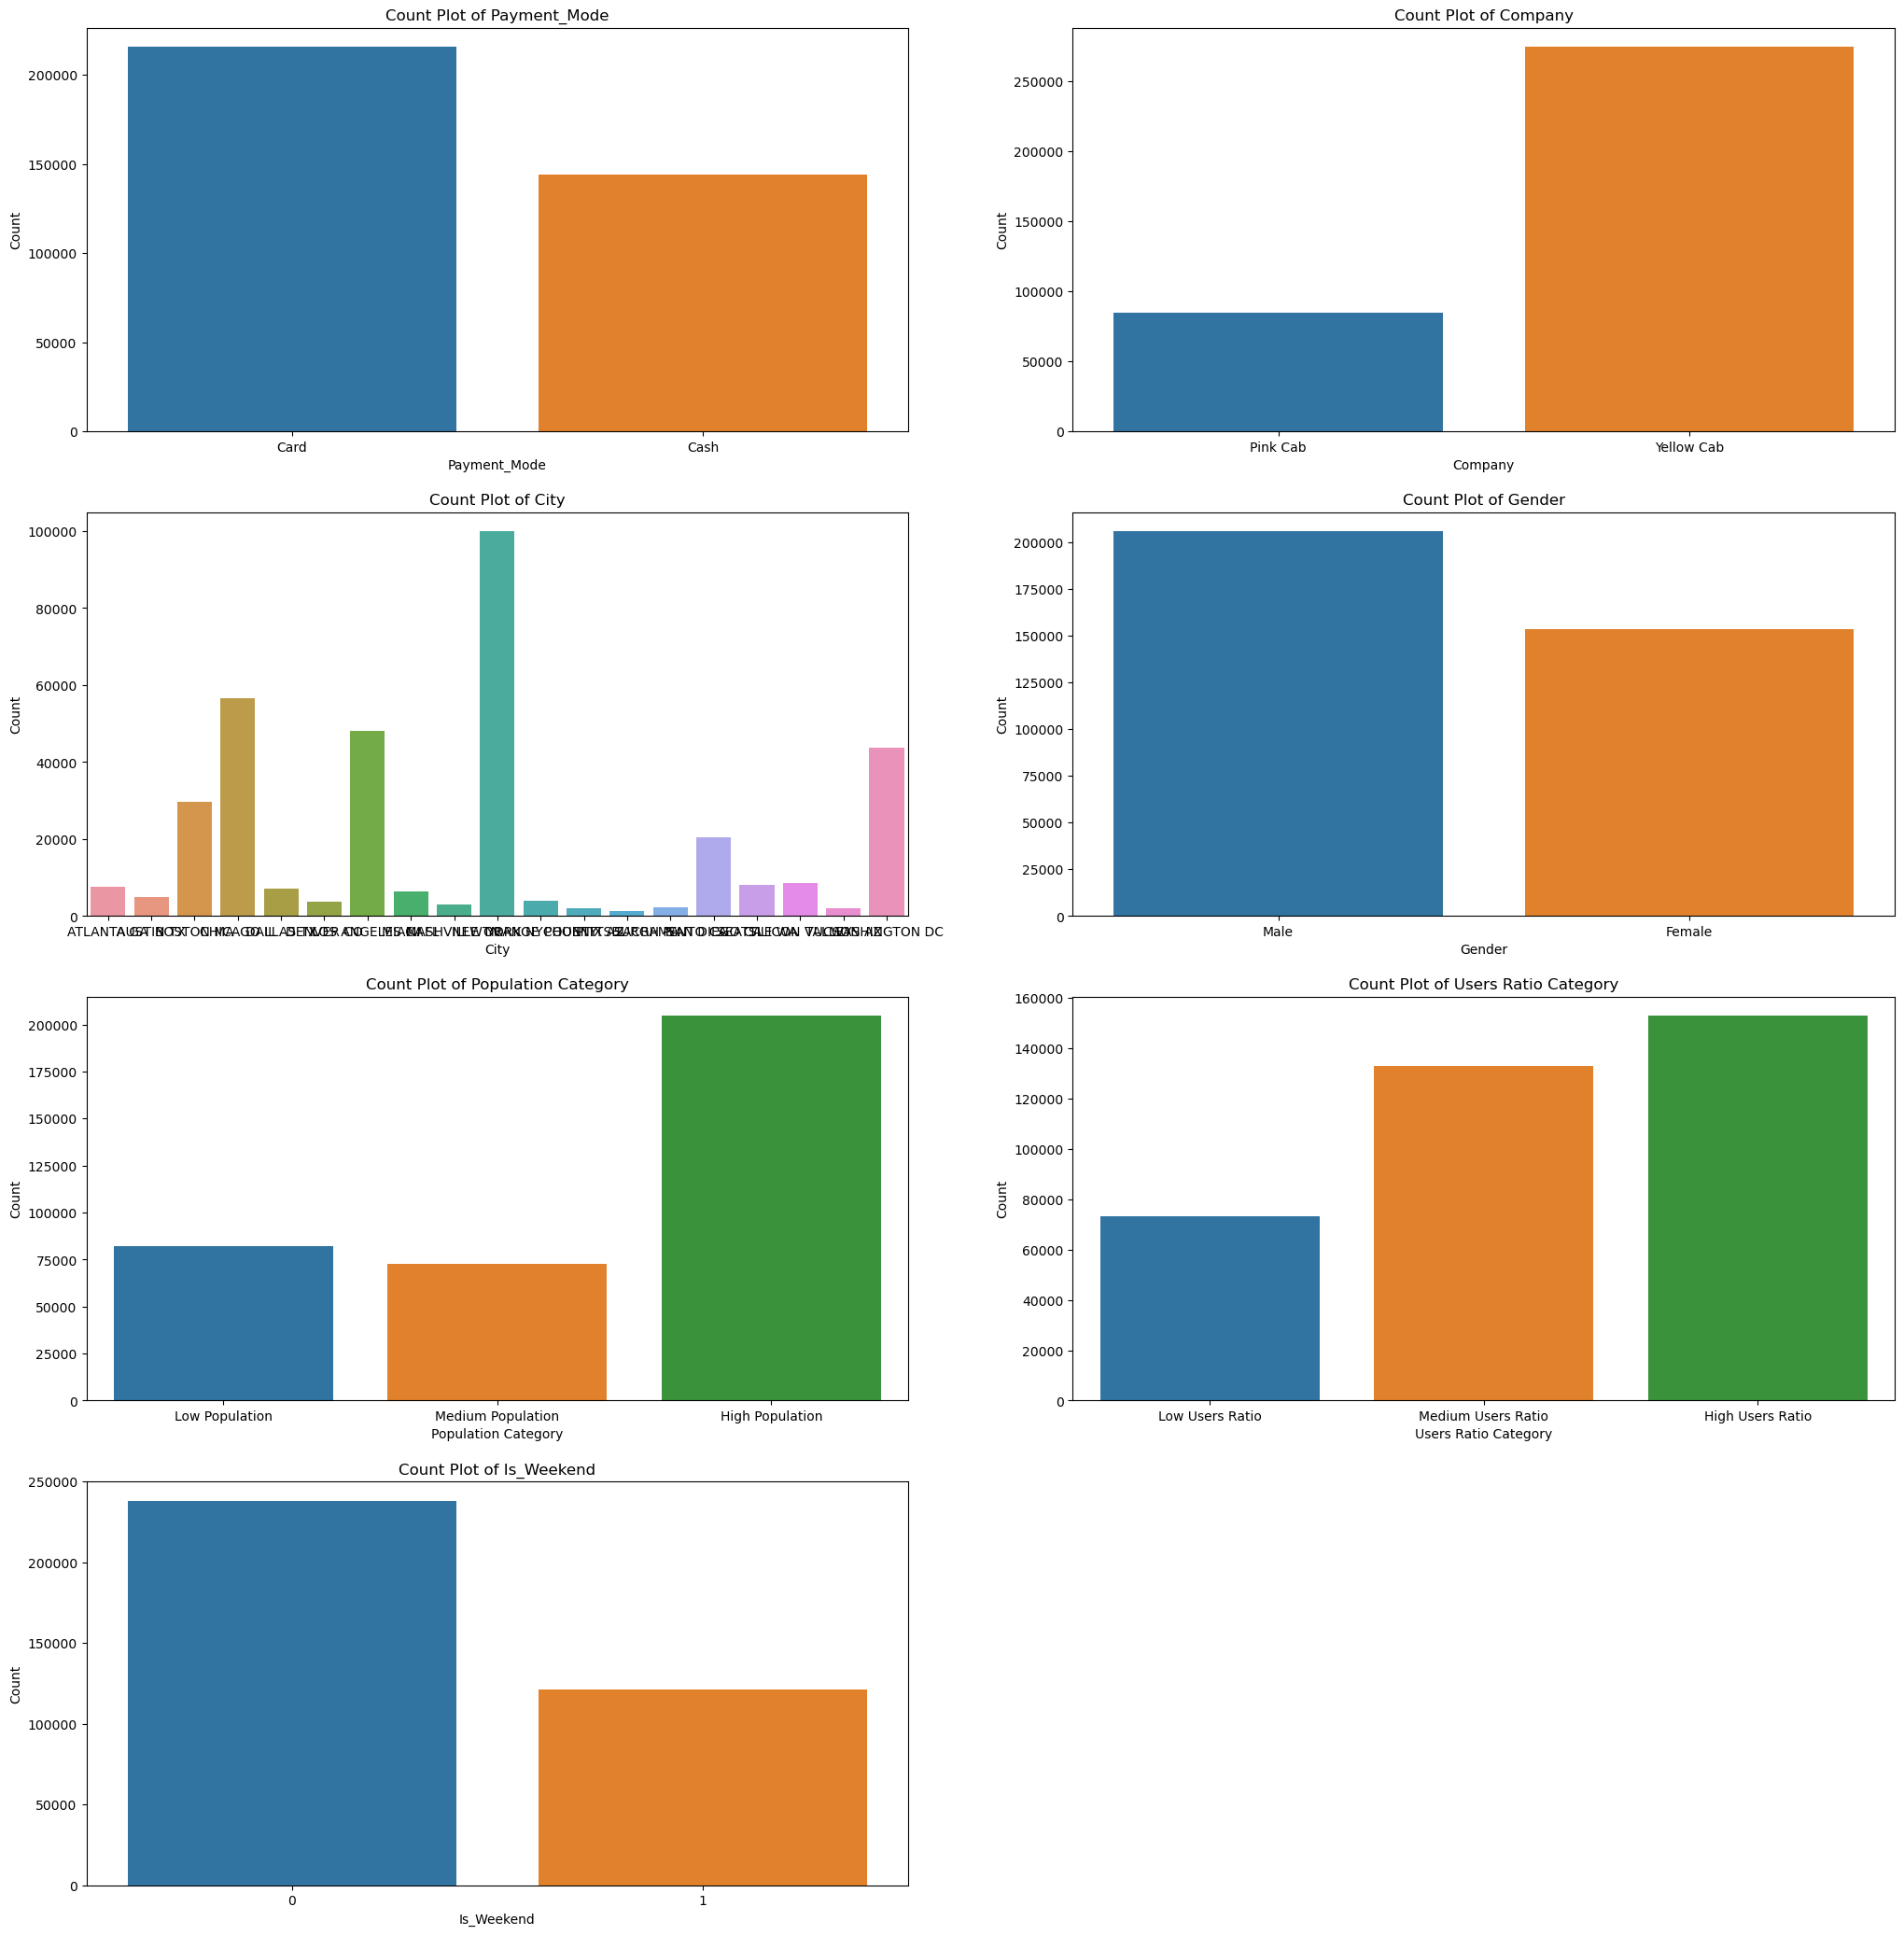

In [34]:
fig = plt.figure(figsize = (25, 100))

    # loop through numerical columns
for i, column in enumerate(cat.columns):
    # create histogram
    plt.subplot(15,2, i+1)
    sns.countplot(data=df, x=column)
    plt.title('Count Plot of ' + column)
    plt.xlabel(column)
    plt.ylabel('Count')
plt.show()

#### Cardinality

In [35]:
for col in cat:
    print('\nFrequency of Categories for variable %s'%col)
    print(cat[col].value_counts())


Frequency of Categories for variable Payment_Mode
Card    215504
Cash    143888
Name: Payment_Mode, dtype: int64

Frequency of Categories for variable Company
Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

Frequency of Categories for variable City
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

Frequency of Categories for variable Gender
Male      205912
Female    153480
Name: Gender, dtype: int64

Frequency of Categories for variable Population Category
High Population      204543
Low Population        82050
Medium Population     7279

### 2.3. Correlation Analysis (Bivariate Analysis)

In [36]:
num.drop(['Transaction ID', 'Customer ID'], axis = 1, inplace = True)

In [37]:
# calculate the correlation matrix
cor = num.corr()

# replace correlation values less than 0.1 with zero
cor = cor.mask(abs(cor) < 0.1, other=0)

# apply a color gradient to the correlation matrix
cor = cor.style.background_gradient(cmap='coolwarm').format('{:.3f}')

# display the correlation matrix
display(cor)

As expected, we observed a high correlation between "KM Traveled" and both "Price Charged" and "Cost of Trip". Additionally, there is a strong correlation between "Population" and "Users". Obtaining more information about these predictors would be beneficial in gaining further insights.

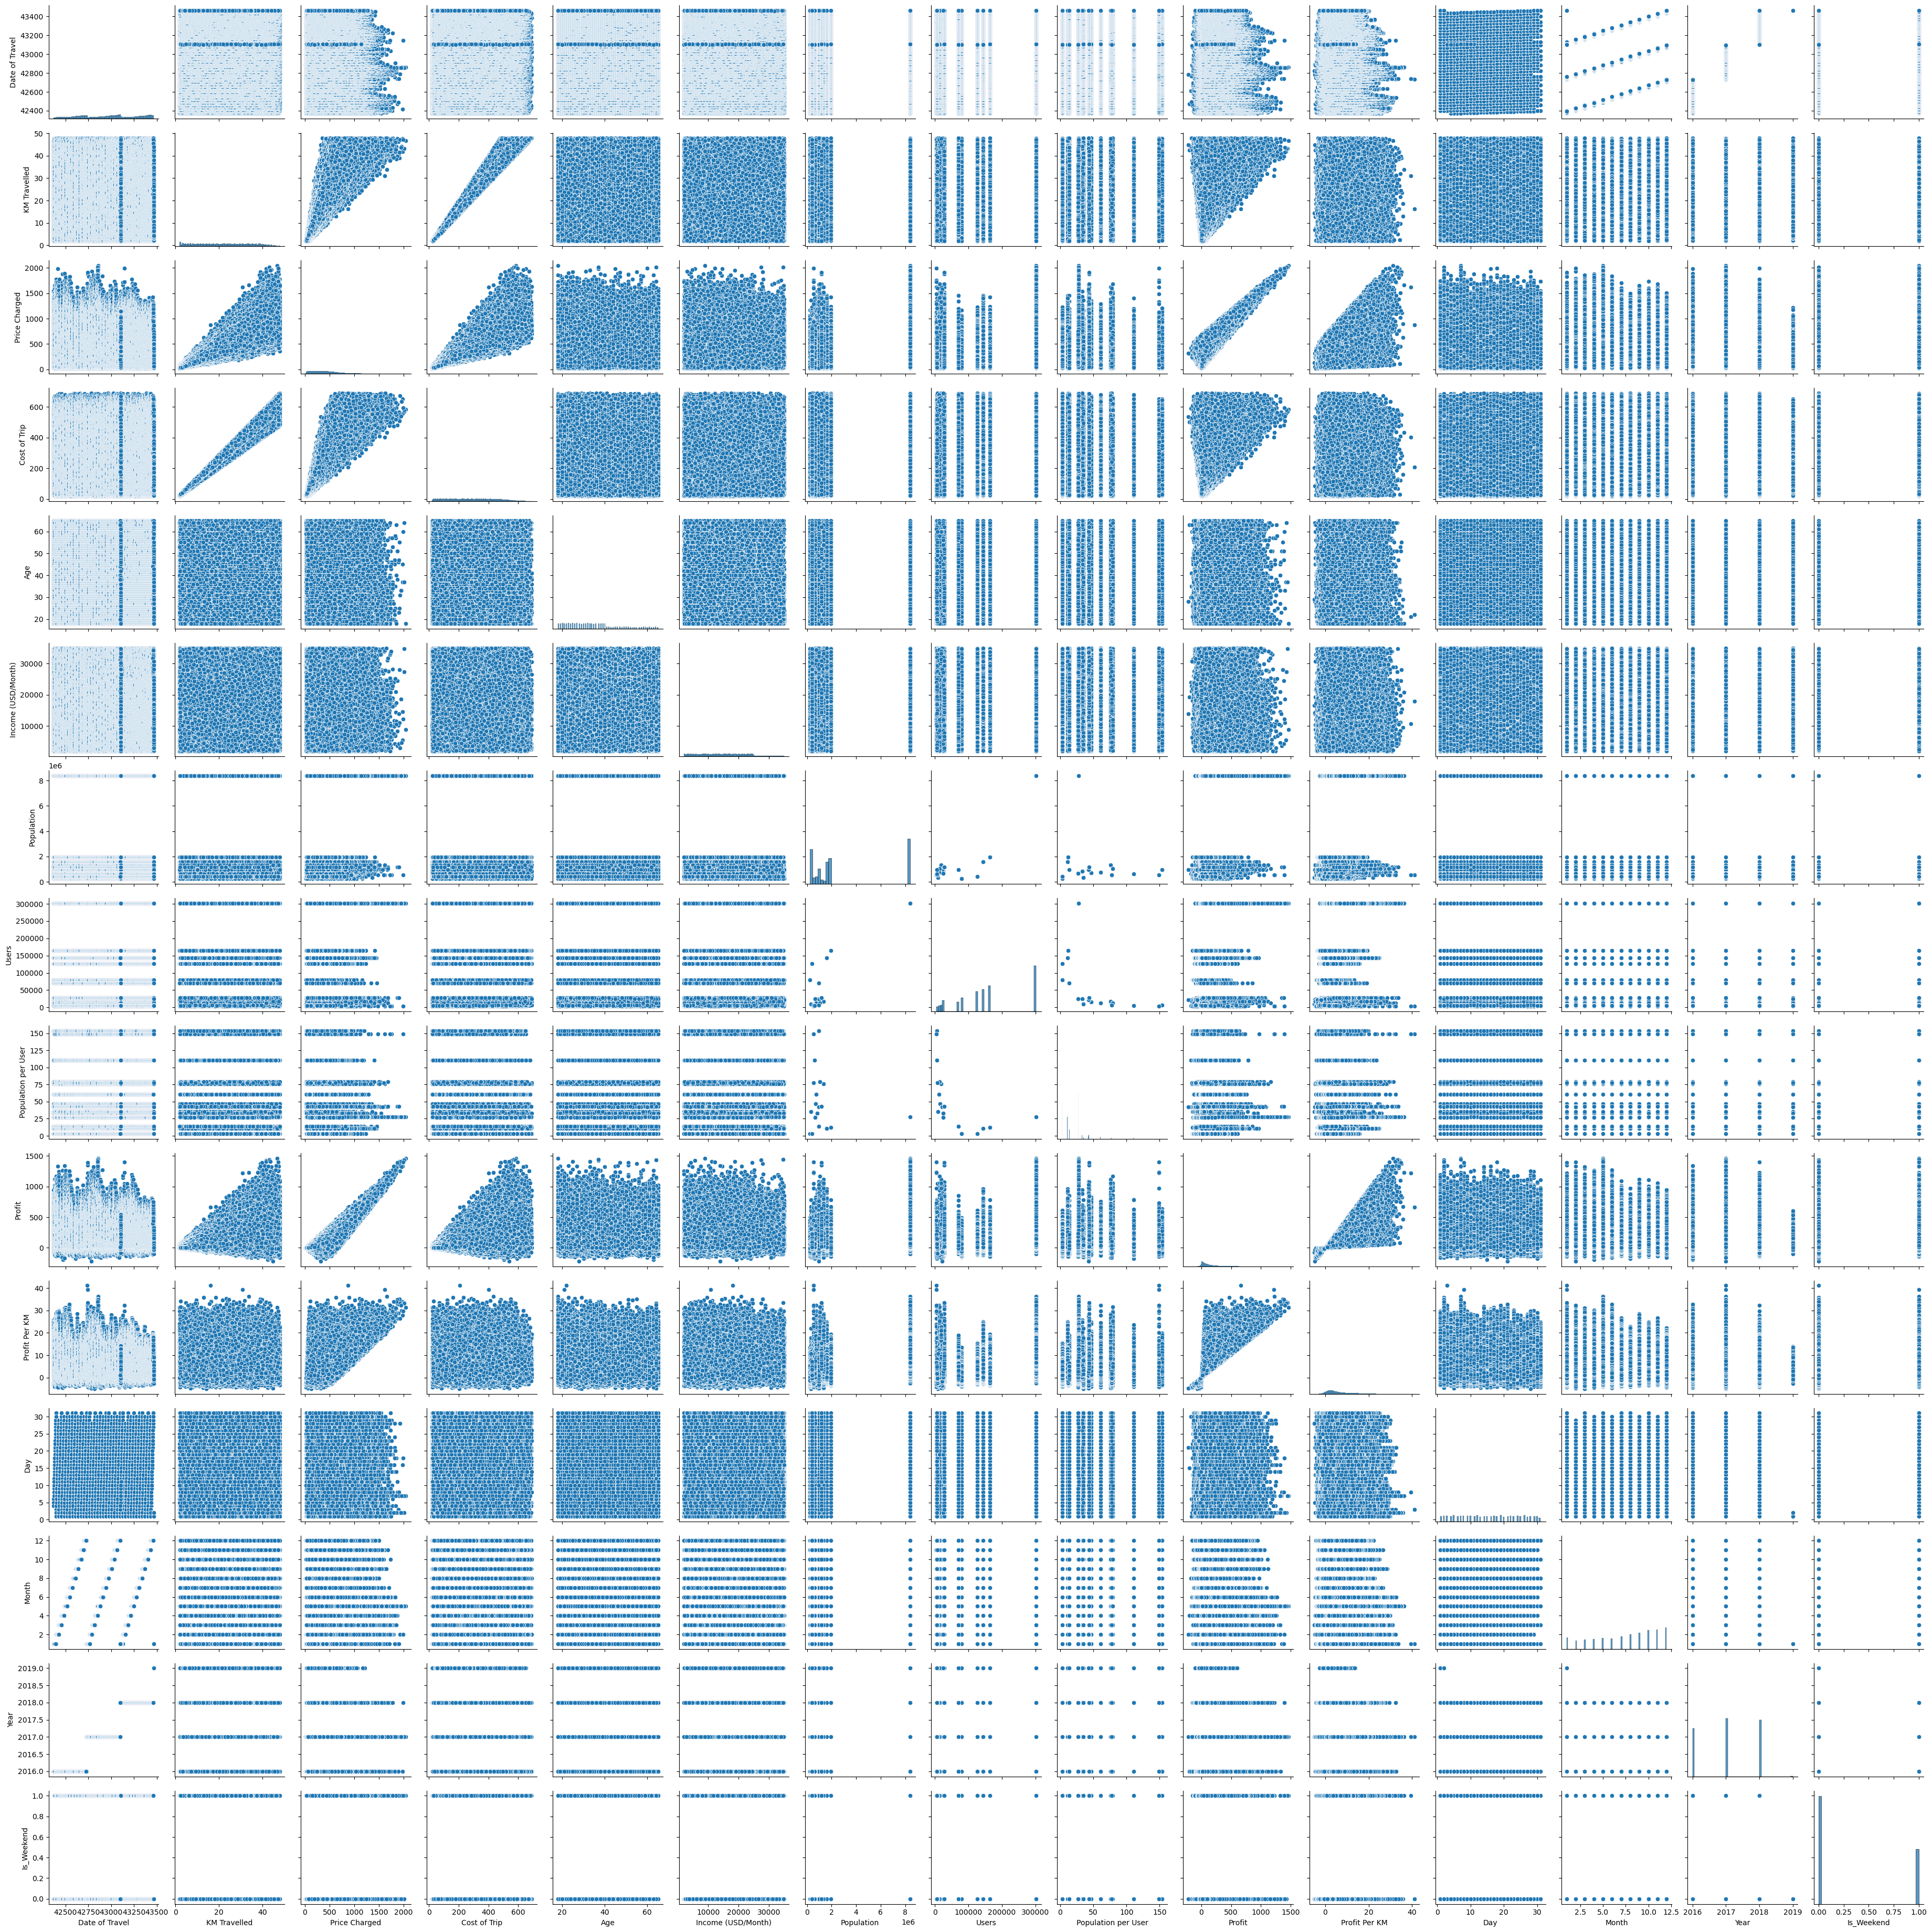

In [38]:
# Pair plot
df1 = df.drop(['Transaction ID', 'Customer ID'], axis = 1)
sns.pairplot(df1)

We can see a strong linear relationship between 'KM Traveled', 'Cost of Trip', and 'Price Charged'. As expected, these predictors are highly correlated. However, to determine the best place to invest, we need to examine variable interactions rather than performing a regression analysis. For now, we can proceed as is, and later we can transform these variables to deal with the collinearity issue when performing regression analysis.

## 3. EDA by the Company

#### Users

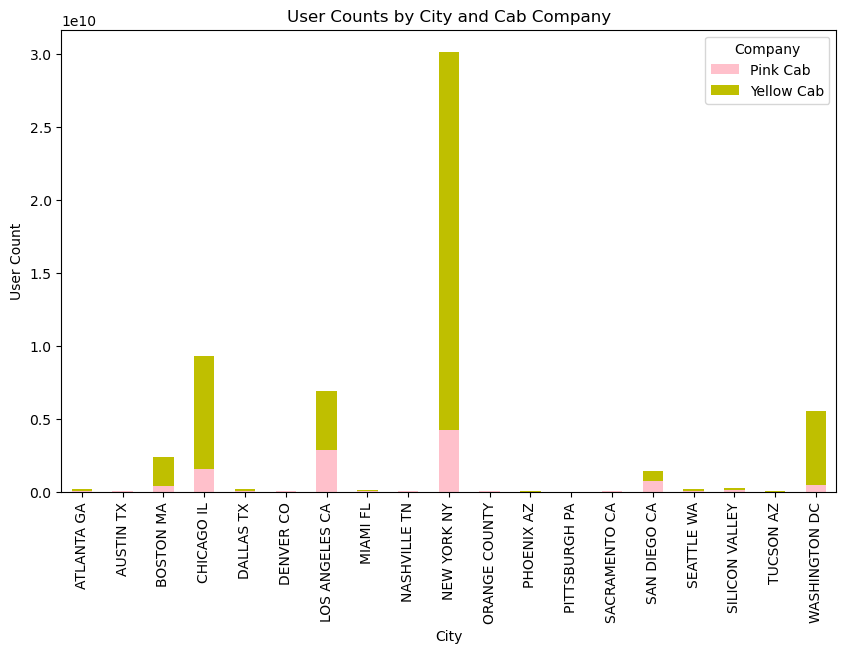

In [39]:
# create a pivot table with user counts by city and cab company
pivot_table = pd.pivot_table(df, values='Users', index='City', columns='Company', aggfunc=sum)

# create a stacked bar chart of the pivot table
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), color = ['pink', 'y'])

# set the chart title and axis labels
ax.set_title('User Counts by City and Cab Company')
ax.set_xlabel('City')
ax.set_ylabel('User Count')

# show the chart
plt.show()

We could see most of the users uses Yellow Cab company.

#### Population

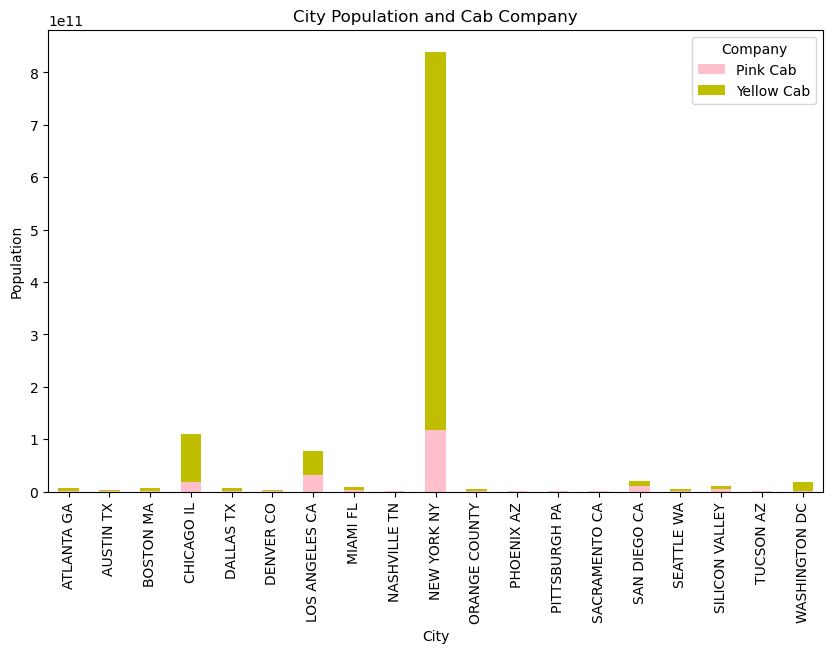

In [40]:
# create a pivot table with user counts by city and cab company
pivot_table = pd.pivot_table(df, values='Population', index='City', columns='Company', aggfunc=sum)

# create a stacked bar chart of the pivot table
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), color = ['pink', 'y'])

# set the chart title and axis labels
ax.set_title('City Population and Cab Company')
ax.set_xlabel('City')
ax.set_ylabel('Population')

# show the chart
plt.show()

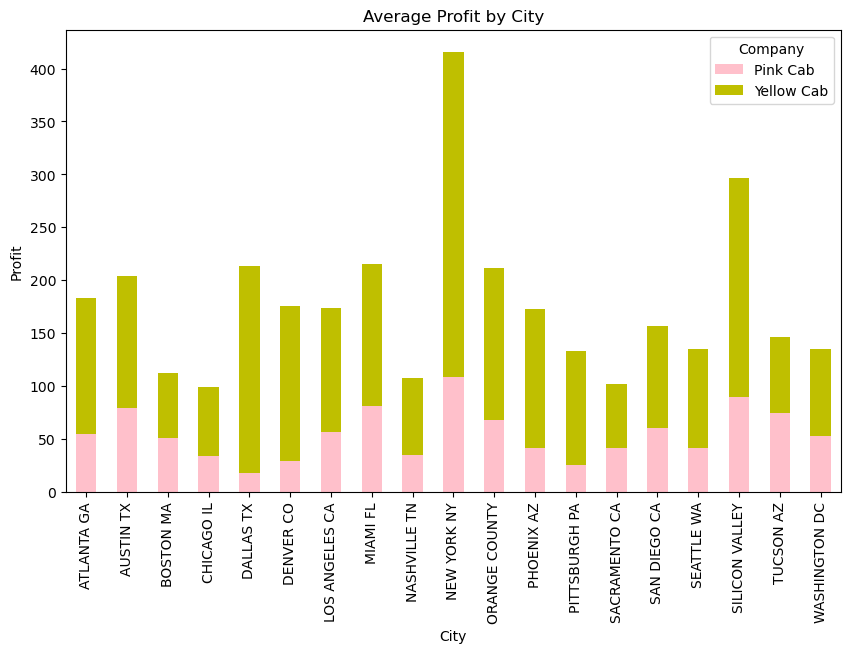

In [41]:
# create a pivot table with average profit by city and cab company
pivot_table = pd.pivot_table(df, values='Profit', index='City', columns='Company', aggfunc='mean')

# create a stacked bar chart of the pivot table
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=['pink', 'y'])

# set the chart title and axis labels
ax.set_title('Average Profit by City')
ax.set_xlabel('City')
ax.set_ylabel('Profit')

# show the chart
plt.show()

We could see New York city has the most average profit follows by Silicon Valley and Miami city. We could see for almost all of the cities, average profit for Yellow cab company is higher except Tucson, AZ.

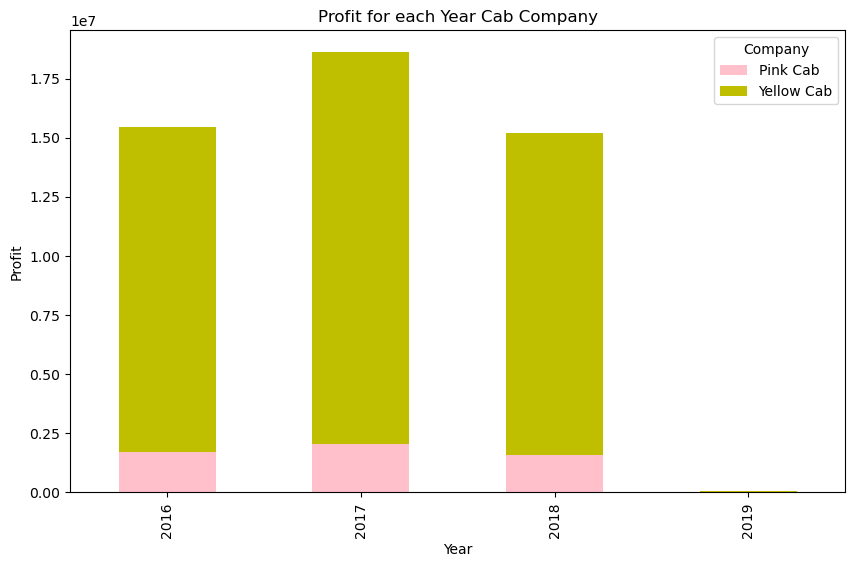

In [42]:
# create a pivot table with user counts by city and cab company
pivot_table = pd.pivot_table(df, values='Profit', index='Year', columns='Company', aggfunc=sum)

# create a stacked bar chart of the pivot table
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), color = ['pink', 'y'])

# set the chart title and axis labels
ax.set_title('Profit for each Year Cab Company')
ax.set_xlabel('Year')
ax.set_ylabel('Profit')

# show the chart
plt.show()

The profit categorized by the year demonstrates a clear difference in sales between Yellow Cab and Pink Cab companies, with Yellow Cab having significantly higher profits. However, both companies experienced a decrease in profit in 2018 compared to the previous two years (2017 and 2016). This decrease may be indicative of a broader industry issue affecting both companies. Further investigation into other datasets and root-cause analysis across the industry is necessary to determine the underlying factors contributing to this trend.

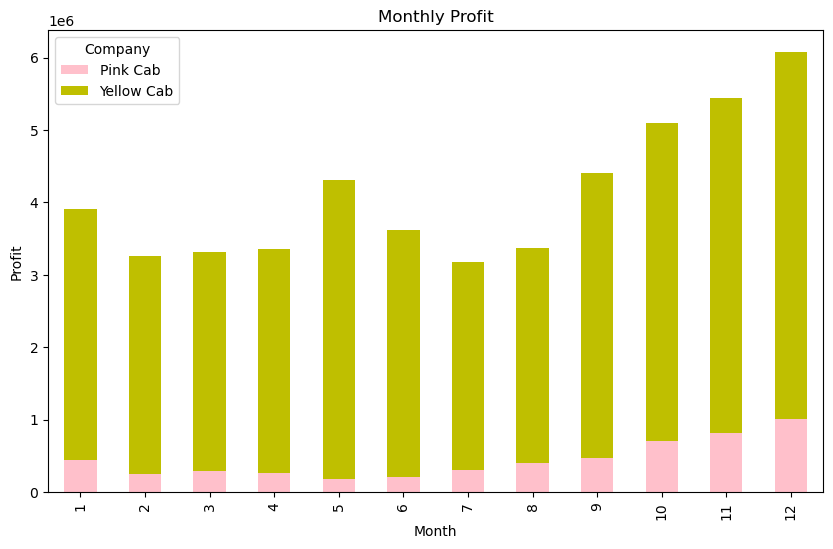

In [43]:
# create a pivot table with user counts by city and cab company
pivot_table = pd.pivot_table(df, values='Profit', index='Month', columns='Company', aggfunc=sum)

# create a stacked bar chart of the pivot table
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), color = ['pink', 'y'])

# set the chart title and axis labels
ax.set_title('Monthly Profit')
ax.set_xlabel('Month')
ax.set_ylabel('Profit')

# show the chart
plt.show()

We can observe a seasonal trend during the months of May and June, as well as from September to December every year.

We could mention during Winter the profit is higher. Also we could notice on the May month is retively higher.

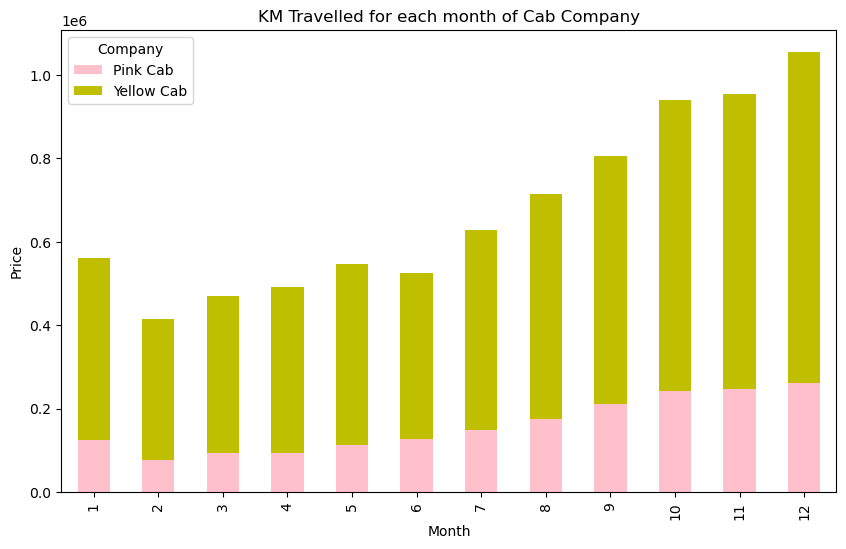

In [44]:
# create a pivot table with user counts by city and cab company
pivot_table = pd.pivot_table(df, values='KM Travelled', index='Month', columns='Company', aggfunc=sum)

# create a stacked bar chart of the pivot table
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), color = ['pink', 'y'])

# set the chart title and axis labels
ax.set_title('KM Travelled for each month of Cab Company')
ax.set_xlabel('Month')
ax.set_ylabel('Price')

# show the chart
plt.show()

We should notice here that however in May the KM travelled is almost same as other first half months, the profit is higher. 


Considering the KM Travelled and by comparing it to the profit chart, we could see overall yellow cab company has higher profit in relation to the KM travelled. 

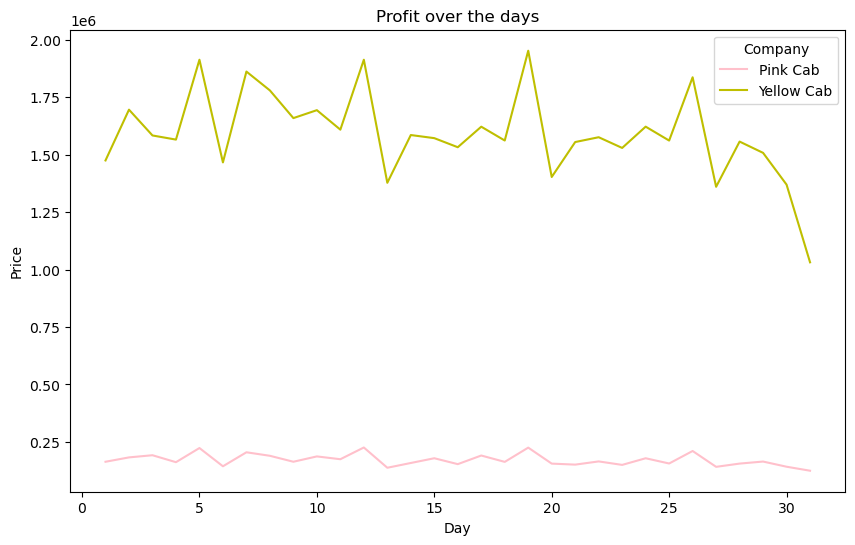

In [45]:
# create a pivot table with user counts by city and cab company
pivot_table = pd.pivot_table(df, values='Profit', index='Day', columns='Company', aggfunc=sum)

# create a stacked bar chart of the pivot table
ax = pivot_table.plot(kind='line', stacked=True, figsize=(10, 6), color = ['pink', 'y'])

# set the chart title and axis labels
ax.set_title('Profit over the days')
ax.set_xlabel('Day')
ax.set_ylabel('Price')

# show the chart
plt.show()

We could notice the profit for the Yellow company at the end of each month decreases meaningfully. 

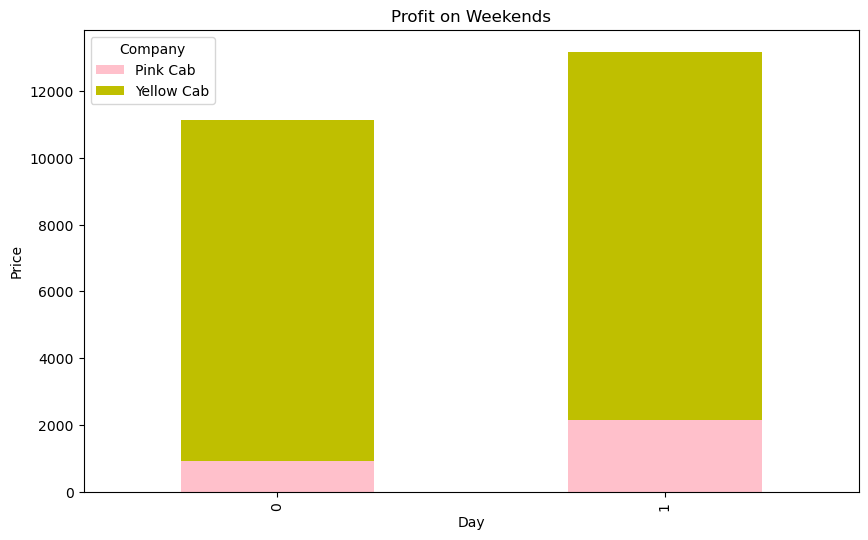

In [46]:
# split the data into weekend and weekday dataframes
weekend_data = df[df['Is_Weekend'] == True]
weekday_data = df[df['Is_Weekend'] == False]

# randomly sample the same number of observations from each group
sample_size = 100
weekend_sample = weekend_data.sample(n=sample_size, random_state=42)
weekday_sample = weekday_data.sample(n=sample_size, random_state=42)

# combine the samples into a new dataframe
sample_df = pd.concat([weekend_sample, weekday_sample])

# create a pivot table with user counts by city and cab company
pivot_table = pd.pivot_table(sample_df, values='Profit', index='Is_Weekend', columns='Company', aggfunc=sum)

# create a stacked bar chart of the pivot table
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), color = ['pink', 'y'])

# set the chart title and axis labels
ax.set_title('Profit on Weekends')
ax.set_xlabel('Day')
ax.set_ylabel('Price')

# show the chart
plt.show()

We set sample size for weekend and weekdays same and we could see, as expected, the weekend profit are higher.

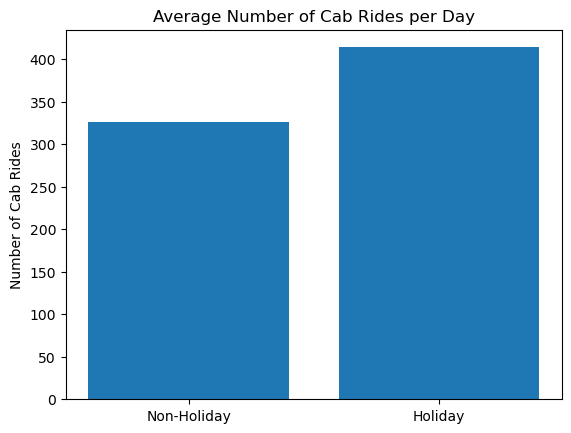

In [47]:
# Generate a sample dataset of US holidays for years 2016 to 2018
holidays_df = pd.DataFrame({
    'Date': pd.to_datetime(['2016-01-01', '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05',
                            '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25',
                            '2017-01-01', '2017-01-16', '2017-02-20', '2017-05-29', '2017-07-04', '2017-09-04',
                            '2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25',
                            '2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28', '2018-07-04', '2018-09-03',
                            '2018-10-08', '2018-11-12', '2018-11-22', '2018-12-25']),
    'Holiday': ['New Year\'s Day', 'Martin Luther King Jr. Day', 'Presidents\' Day', 'Memorial Day', 'Independence Day', 'Labor Day',
                'Columbus Day', 'Veterans Day', 'Thanksgiving Day', 'Christmas Day',
                'New Year\'s Day', 'Martin Luther King Jr. Day', 'Presidents\' Day', 'Memorial Day', 'Independence Day', 'Labor Day',
                'Columbus Day', 'Veterans Day', 'Thanksgiving Day', 'Christmas Day',
                'New Year\'s Day', 'Martin Luther King Jr. Day', 'Presidents\' Day', 'Memorial Day', 'Independence Day', 'Labor Day',
                'Columbus Day', 'Veterans Day', 'Thanksgiving Day', 'Christmas Day']
})
# Convert cab Date column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Merge cab data with holidays data on pickup date
merged_df = pd.merge(df, holidays_df, how='left', on='Date')

# Calculate the average number of cab rides per holiday and non-holiday days
non_holiday_rides = merged_df[merged_df['Holiday'].isna()]['Transaction ID'].count() / len(merged_df[merged_df['Holiday'].isna()].Date.dt.date.unique())
holiday_rides = merged_df[~merged_df['Holiday'].isna()]['Transaction ID'].count() / len(merged_df[~merged_df['Holiday'].isna()].Date.dt.date.unique())

# Plot a bar chart of the average number of cab rides per holiday and non-holiday days
plt.bar(['Non-Holiday', 'Holiday'], [non_holiday_rides, holiday_rides])
plt.title('Average Number of Cab Rides per Day')
plt.ylabel('Number of Cab Rides')
plt.show()

We could see the holiday's number of rides are 23 percent higher than regular days (weekdays and weekends).

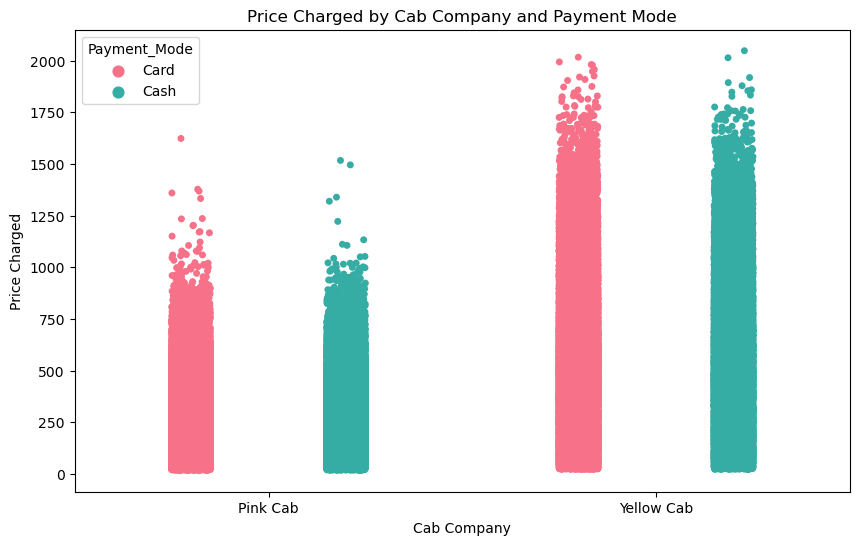

In [48]:
# create a stacked stripplot with custom size
plt.figure(figsize=(10,6))
sns.stripplot(x="Company", y="Price Charged", hue = 'Payment_Mode', data=df, palette="husl", dodge=True)

# set plot title and axis labels
plt.title('Price Charged by Cab Company and Payment Mode')
plt.xlabel('Cab Company')
plt.ylabel('Price Charged')

# show the plot
plt.show()

Here we could see those customers who used Cards, spend morein yellow cab company however in the Pink Company they are almost the same.

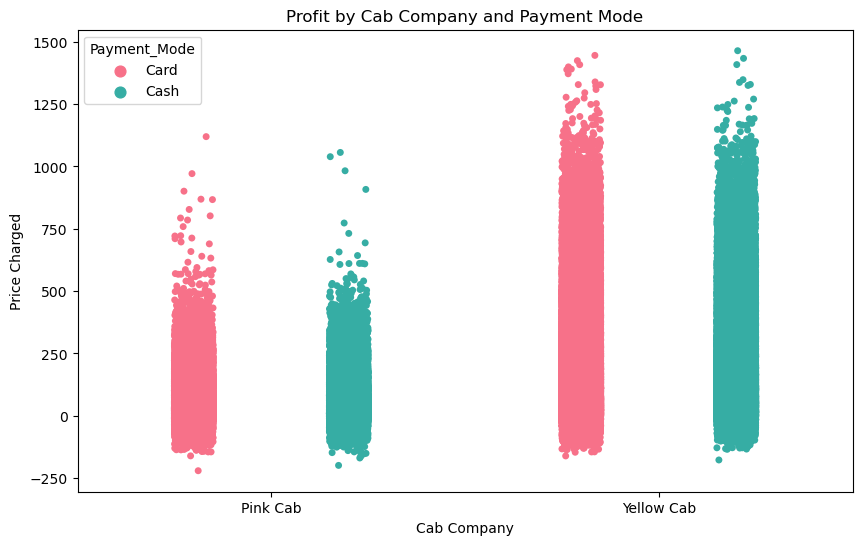

In [49]:
# create a stacked stripplot with custom size
plt.figure(figsize=(10,6))
sns.stripplot(x="Company", y="Profit", hue = 'Payment_Mode', data=df, palette="husl", dodge=True)

# set plot title and axis labels
plt.title('Profit by Cab Company and Payment Mode')
plt.xlabel('Cab Company')
plt.ylabel('Price Charged')

# show the plot
plt.show()

We could see the profit for the Cash payment is lower. Moreover the Yellow Cab Company recorded more losses.

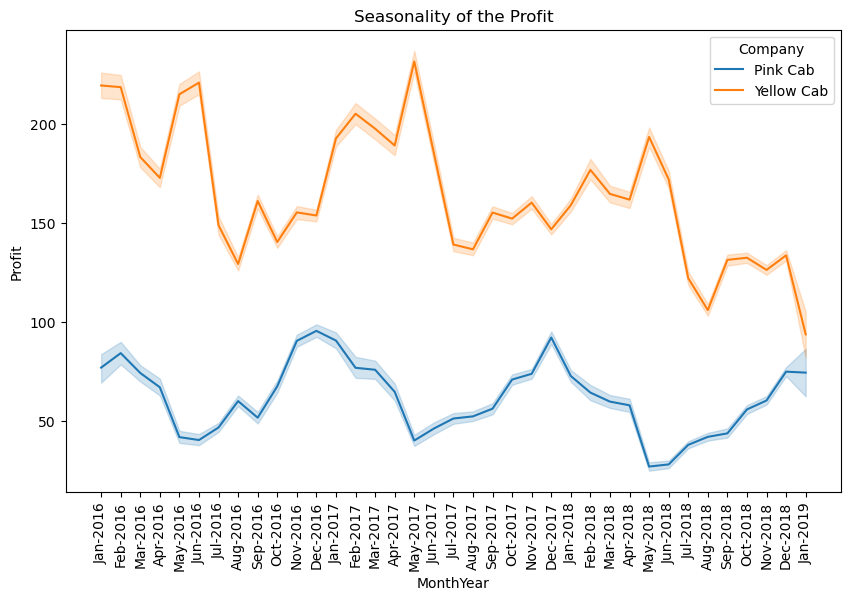

In [50]:
# convert Date column to datetime object
df['Date'] = pd.to_datetime(df['Date'])

# extract month and year from Date column
df['MonthYear'] = df['Date'].dt.strftime('%b-%Y')

# plot line graph
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='MonthYear', y='Profit', hue='Company')
plt.xticks(rotation=90)
plt.title('Seasonality of the Profit')

plt.show()

Here we could see that however the profit of the Yellow Cab Company is higher Overall, but the trend is downward. On the other hand Pink Company is more stable with stable seasonality with the most profir on Nov, Dec, Jan.

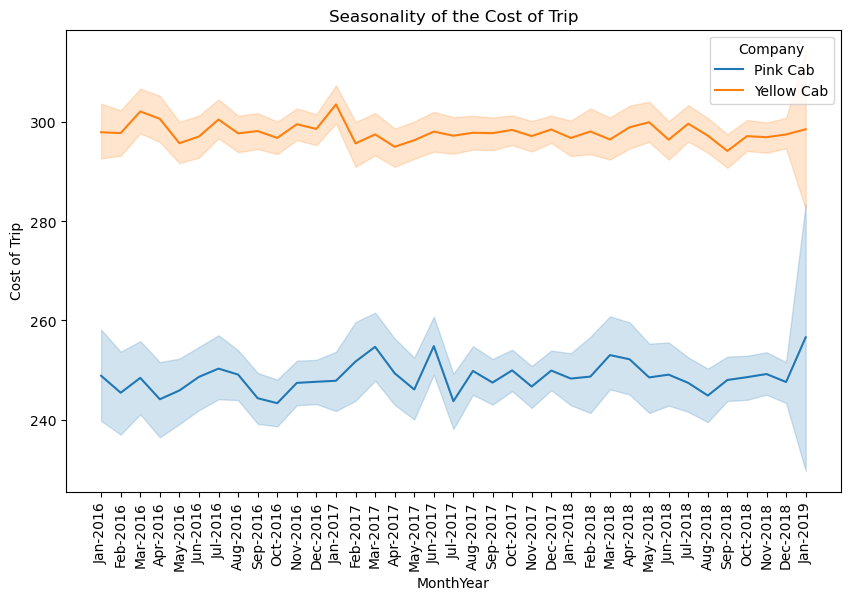

In [51]:
# plot line graph
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='MonthYear', y='Cost of Trip', hue='Company')
plt.xticks(rotation=90)
plt.title('Seasonality of the Cost of Trip')

plt.show()

Considering the cost of the trips, Yellow cab company has relatively higher costs however the last month on Jan 2019 for the Pink company interestingly spikes and it could be a signal to better take a look on it.

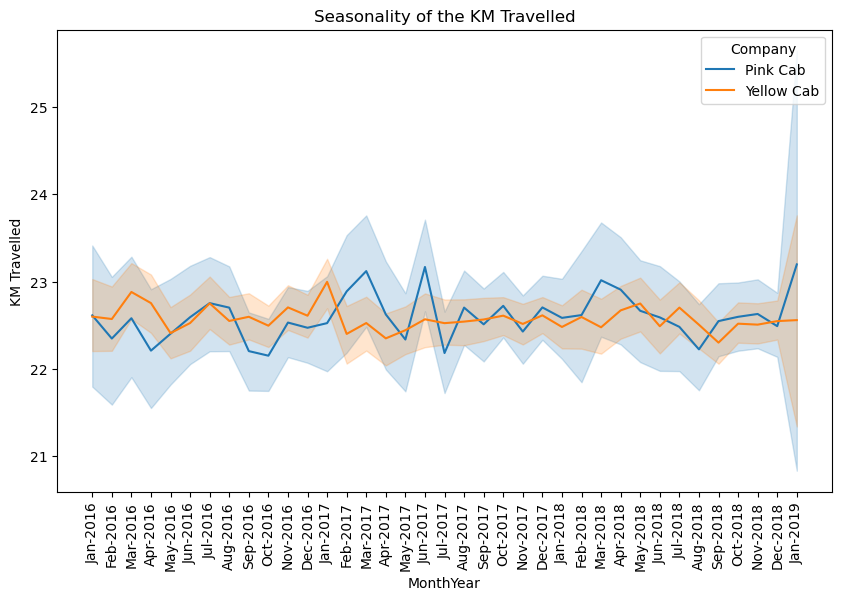

In [52]:
# plot line graph
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='MonthYear', y='KM Travelled', hue='Company')
plt.xticks(rotation=90)
plt.title('Seasonality of the KM Travelled')

plt.show()

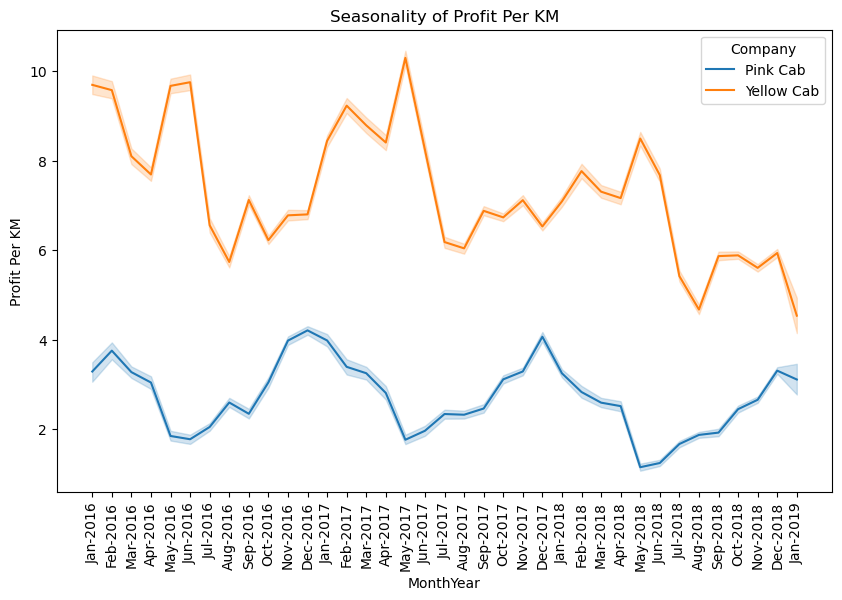

In [53]:
# plot line graph
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='MonthYear', y='Profit Per KM', hue='Company')
plt.xticks(rotation=90)
plt.title('Seasonality of Profit Per KM')

plt.show()

Here we observe that the cost increased with an increase in the distance traveled (KM Traveled). However, the profit chart shows that despite the increase in distance traveled, the profit for the last month did not increase accordingly, and even the profit per KM decreases. We should notice this decrease happened in the Yellow company too, whowever this copany did not face increase in cost or increase in KM Travelled, we could conclude this could be an external effect (regulation, policy or tax, etc).

In [54]:
df = df[df['Year'] != 2019]

In [55]:
df.head()

Transaction ID  Customer ID Payment_Mode  Date of Travel   Company  \
0        10000011        29290         Card           42377  Pink Cab   
1        10000012        27703         Card           42375  Pink Cab   
2        10000013        28712         Cash           42371  Pink Cab   
3        10000014        28020         Cash           42376  Pink Cab   
4        10000015        27182         Card           42372  Pink Cab   

         City  KM Travelled  Price Charged  Cost of Trip Gender  Age  \
0  ATLANTA GA         30.45         370.95       313.635   Male   28   
1  ATLANTA GA         28.62         358.52       334.854   Male   27   
2  ATLANTA GA          9.04         125.20        97.632   Male   53   
3  ATLANTA GA         33.17         377.40       351.602   Male   23   
4  ATLANTA GA          8.73         114.62        97.776   Male   33   

   Income (USD/Month)  Population  Users Population Category  \
0               10813      814885  24701   Medium Population   
1                9237      814885  24701   Medium Population   
2               11242      814885  24701   Medium Population   
3               23327      814885  24701   Medium Population   
4                8536      814885  24701   Medium Population   

   Population per User Users Ratio Category  Profit  Profit Per KM       Date  \
0             32.98996     High Users Ratio  57.315       1.882266 2016-01-10   
1             32.98996     High Users Ratio  23.666       0.826904 2016-01-08   
2             32.98996     High Users Ratio  27.568       3.049558 2016-01-04   
3             32.98996     High Users Ratio  25.798       0.777751 2016-01-09   
4             32.98996     High Users Ratio  16.844       1.929439 2016-01-05   

   Day  Month  Year  Is_Weekend MonthYear  
0   10      1  2016           1  Jan-2016  
1    8      1  2016           0  Jan-2016  
2    4      1  2016           0  Jan-2016  
3    9      1  2016           1  Jan-2016  
4    5      1  2016           0  Jan-2016

C:\Users\mahya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mahya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mahya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mahya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mahya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

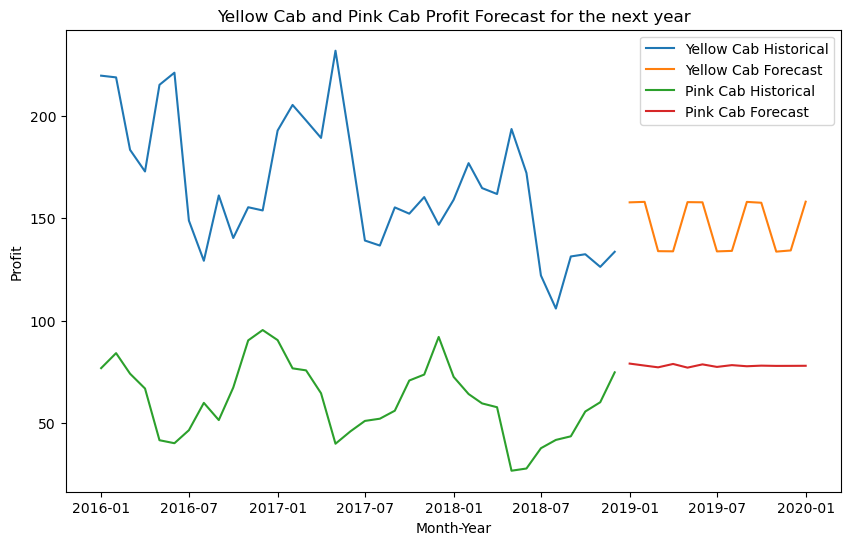

In [56]:
from statsmodels.tsa.arima.model import ARIMA

# Convert Date column to datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year from Date column
df['MonthYear'] = df['Date'].dt.strftime('%b-%Y')

# Group data by month and company
df_monthly = df.groupby([pd.Grouper(key='Date', freq='MS'), 'Company']).mean().reset_index()

# Pivot the data to wide format
df_pivot = df_monthly.pivot(index='Date', columns='Company', values='Profit')

# Fit ARIMA model to Yellow Cab profit data
model_yellow_cab = ARIMA(df_pivot['Yellow Cab'], order=(2,1,2))
model_yellow_cab_fit = model_yellow_cab.fit()

# Fit ARIMA model to Pink Cab profit data
model_pink_cab = ARIMA(df_pivot['Pink Cab'], order=(2,1,2))
model_pink_cab_fit = model_pink_cab.fit()

# Predict profits for both companies for the next year
start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2020-01-01')
forecast_yellow_cab = model_yellow_cab_fit.predict(start=start_date, end=end_date, typ='levels')
forecast_pink_cab = model_pink_cab_fit.predict(start=start_date, end=end_date, typ='levels')

# Plot the historical and forecasted profits for both companies
plt.figure(figsize=(10,6))
plt.plot(df_pivot.index, df_pivot['Yellow Cab'], label='Yellow Cab Historical')
plt.plot(forecast_yellow_cab.index, forecast_yellow_cab, label='Yellow Cab Forecast')
plt.plot(df_pivot.index, df_pivot['Pink Cab'], label='Pink Cab Historical')
plt.plot(forecast_pink_cab.index, forecast_pink_cab, label='Pink Cab Forecast')
plt.xlabel('Month-Year')
plt.ylabel('Profit')
plt.title('Yellow Cab and Pink Cab Profit Forecast for the next year')
plt.legend()
plt.show()
